The goal has been found


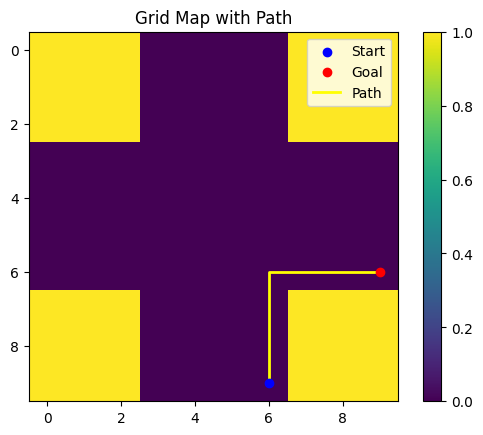

In [3]:
import numpy as np
import copy
from typing import List
import matplotlib.pyplot as plt

FREE = 0
OCCUPIED = 100

class KinematicAStarPlanner():
    def __init__(self, grid_map):
        self.row = len(grid_map)
        self.col = len(grid_map[0])
        self.grid_map = copy.deepcopy(grid_map)
        self.possible_moves = [[1, 0, 0, 0], [0, 1, 0, 0], [-1, 0, 0, 0], [0, -1, 0, 0]]
    
    def is_valid(self, state):
        pos = (int(state[0]), int(state[1]))
        # Check if position is within grid boundaries
        if pos[0] < 0 or pos[1] < 0 or pos[0] >= self.row or pos[1] >= self.col:
            return False
        # Check if position is not occupied (grid cell value is 0)
        if self.grid_map[pos[0]][pos[1]] != FREE:
            return False
        return True

    
    def cal_heuristic(self, state, goal):
        # Euclidean distance heuristic
        return np.linalg.norm(np.array(state[:2]) - np.array(goal[:2]))
    
    def search(self, start, goal, heu_wgt=1):
        self.start = start
        self.goal = goal
        if not self.is_valid(start) or not self.is_valid(goal):
            print("The start or the goal is not valid")
            return False
        
        self.explored = []
        self.unexplored = []
        self.g_score = [[float('inf') for _ in range(self.row)] for _ in range(self.col)]
        self.f_score = [[float('inf') for _ in range(self.row)] for _ in range(self.col)]
        self.track_back = {}
        
        self.unexplored.append(start)
        self.g_score[int(start[0])][int(start[1])] = 0
        self.f_score[int(start[0])][int(start[1])] = heu_wgt * self.cal_heuristic(start, goal)
        self.track_back[start] = None
        
        while self.unexplored:
            cur = self.unexplored.pop(0)
            self.explored.append(cur)
            
            if cur[:2] == goal[:2]:
                print("The goal has been found")
                return True
            
            next_possible_pos = [(cur[0] + move[0], cur[1] + move[1], cur[2] + move[2], cur[3] + move[3]) for move in self.possible_moves]
            for pos in next_possible_pos:
                if not self.is_valid(pos):
                    continue
                
                g_score_tmp = self.g_score[int(cur[0])][int(cur[1])] + 1
                if g_score_tmp < self.g_score[int(pos[0])][int(pos[1])]:
                    self.g_score[int(pos[0])][int(pos[1])] = g_score_tmp
                    self.f_score[int(pos[0])][int(pos[1])] = g_score_tmp + heu_wgt * self.cal_heuristic(pos, goal)
                    self.track_back[pos] = cur
                    if pos not in self.unexplored and pos not in self.explored:
                        self.unexplored.append(pos)
            
            self.unexplored.sort(key=lambda pos: self.f_score[int(pos[0])][int(pos[1])])
        
        print("No valid path to the goal")
        return False
    
    def visualize_path(self, path):
        plt.imshow(self.grid_map)
        plt.title("Grid Map with Path")
        plt.colorbar()
        
        # Plot start and goal
        plt.scatter(self.start[1], self.start[0], color='blue', label='Start', zorder=5)
        plt.scatter(self.goal[1], self.goal[0], color='red', label='Goal', zorder=5)
        
        # Plot path
        if path:
            path_x = [state[1] for state in path]
            path_y = [state[0] for state in path]
            plt.plot(path_x, path_y, color='yellow', linewidth=2, label='Path')
        
        plt.legend()
        plt.show()

# Example usage:
grid_map = [[1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],  
            [1, 1, 1, 0, 0, 0, 0, 1, 1, 1]]

start = (9, 6, 0, 0)  # Initial state: (x, y, vx, vy)
goal = (6, 9, 0, 0)    # Goal state: (x, y, vx, vy)

a_star_planner = KinematicAStarPlanner(grid_map)
goal_found = a_star_planner.search(start, goal, heu_wgt=1)

if goal_found:
    path = []
    cur = goal
    while cur:
        path.append(cur[:2])
        cur = a_star_planner.track_back.get(cur)
    path.reverse()
    a_star_planner.visualize_path(path)
